In [2]:
import torch
import d2l.torch as d2l

# 重新设计一个求控制流梯度的例子，运行并分析结果。

In [3]:
def func(x):
    return torch.where(x >= 0, x, torch.tensor(0.))

def func_grad(x):
    return torch.where(x >=0, 1, torch.tensor(0.))

定义了一个类似于`relu`的函数
`torch.where`函数, 相当于python中的三元组表达式 `a if condition else b`
<br>参数1: condition
<br>参数2: a
<br>参数3: b

In [4]:
x = torch.randn(10, requires_grad=True)
y = func(x)
y.sum().backward()

x_grad = func_grad(x)
print(x.grad == x_grad)

tensor([True, True, True, True, True, True, True, True, True, True])


# 使$f(x)=\sin(x)$，绘制$f(x)$和$\frac{df(x)}{dx}$的图像，其中后者不使用$f'(x)=\cos(x)$。

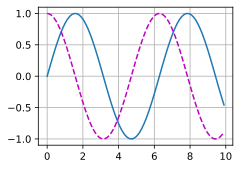

In [5]:
def f(x):
    return torch.sin(x)

x = torch.arange(0, 10.0, 0.1, requires_grad=True)
shape = x.shape
y = f(x)
y.backward(torch.ones(shape))
d2l.plot(x.detach().numpy(), (y.detach().numpy(), x.grad))